# Bernstein-Vazirani Algoritması

Bu bölümde önce Bernstein-Vazirani problemini, klasik çözümünü ve problemi çözmek için kullanılan kuantum algoritmasını tanıtıyoruz. Ardından kuantum algoritmayı Qiskit ile gerçekleştiriyor, hem bir simülatörde hem de gerçek bir cihazda çalıştırıyoruz.

## 1. Bernstein-Vazirani Algoritması<a id='algorithm'></a>

İlk kez Kaynak [1]’de sunulan Bernstein-Vazirani algoritması, önceki bölümde ele aldığımız Deutsch-Jozsa algoritmasının bir uzantısı olarak görülebilir. Deutsch-Jozsa probleminden daha karmaşık problemler için de kuantum bilgisayar kullanmanın avantaj sağlayabileceğini göstermiştir.

### 1.1 Bernstein-Vazirani Problemi <a id='bvproblem'></a>

Yine, girdi olarak bir bit dizisi ($x$) alan ve çıktı olarak $0$ ya da $1$ döndüren bir kara-kutu fonksiyonu $f$ verilsin:

$$
f(\{x_0,x_1,x_2,\dots\}) \rightarrow 0 \textrm{ veya } 1, \quad \text{burada } x_n \in\{0,1\}
$$ 

Deutsch-Jozsa probleminde fonksiyonun dengeli veya sabit olması garantisi varken, burada fonksiyonun girdiyle gizli bir bit dizisinin ($s$) bit-bit çarpımını (mod 2) döndürdüğü garantilidir. Yani verilen $x$ girdisi için
$$
f(x) = s \cdot x \pmod 2.
$$
Görevimiz $s$ dizisini bulmaktır. Klasik tersinir devre olarak Bernstein-Vazirani oracle’ı şöyle görünür:

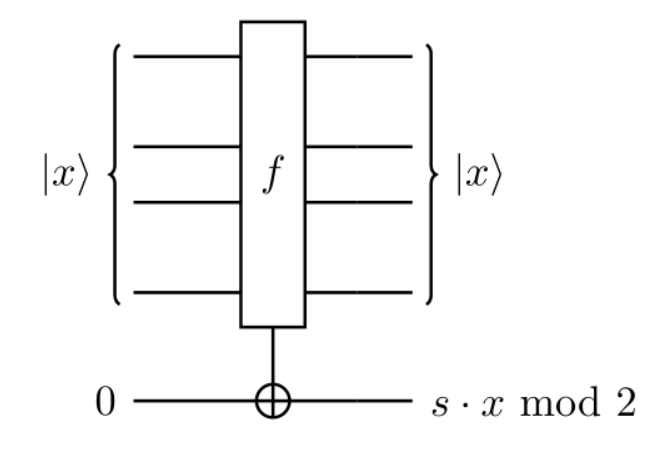

### 1.2 Klasik Çözüm <a id='classical-solution'></a>

Klasik olarak oracle,
$$
f_s(x) = s \cdot x \pmod 2
$$
değerini döndürür. Gizli bit dizisi $s$, aşağıdaki girdi dizisiyle oracle’ı sorgulayarak ortaya çıkarılabilir:

| Girdi ($x$) |
|:-----------:|
|100…0|
|010…0|
|001…0|
|000…1|

Her sorgu $s$’in farklı bir bitini ($s_i$) açığa çıkarır. Örneğin `x = 100...0` girdisiyle $s$’in en az anlamlı biti, `x = 010...0` ile bir sonraki bit vb. elde edilir. Bu, fonksiyon $f_s(x)$’i **$n$ kez** çağırmamız gerektiği anlamına gelir.

### 1.3 Kuantum Çözüm <a id='quantum-solution'></a>

Bir kuantum bilgisayar kullanarak problemi **yalnızca bir oracle çağrısıyla** %100 güvenle çözebiliriz. Gizli bit dizisini bulmak için kuantum Bernstein-Vazirani algoritması çok basittir:

1. Girdi kubitlerini $|0\rangle^{\otimes n}$, çıktı kubitini $|{-}\rangle$ durumuna ayarla.  
2. Girdi register’ına Hadamard kapıları uygula.  
3. Oracle’ı çağır.  
4. Girdi register’ına tekrar Hadamard kapıları uygula.  
5. Ölçüm yap.

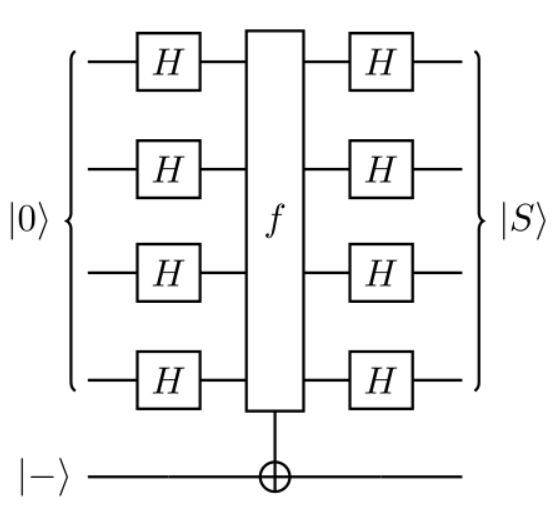

Algoritmayı açıklamak için, her kubite H-kapısı uyguladığımızda neler olduğuna yakından bakalım. $n$-kubitlik bir $|a\rangle$ durumu varsa ve H-kapıları uygulanırsa:

$$
|a\rangle \xrightarrow{H^{\otimes n}} \frac{1}{\sqrt{2^n}} \sum_{x\in\{0,1\}^n} (-1)^{a\cdot x}\,|x\rangle.
$$

<details>
    <summary>Denklemin Açıklaması (Tıklayarak Genişlet)</summary>

Hadamard’ın tek kubit üzerindeki dönüşümleri:

$$
H|0\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle), \qquad
H|1\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle).
$$

Toplam (summation) gösterimiyle:

$$
H|a\rangle = \frac{1}{\sqrt{2}}
\sum_{x\in\{0,1\}} (-1)^{a\cdot x}\,|x\rangle.
$$

İki kubit için:

$$
H^{\otimes 2}|00\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle),\\
H^{\otimes 2}|01\rangle = \tfrac{1}{2}(|00\rangle - |01\rangle + |10\rangle - |11\rangle),\\
H^{\otimes 2}|10\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle),\\
H^{\otimes 2}|11\rangle = \tfrac{1}{2}(|00\rangle - |01\rangle - |10\rangle + |11\rangle).
$$

Bu da şöyle özetlenebilir:

$$
H^{\otimes 2}|a\rangle = \frac{1}{2}\sum_{x\in\{0,1\}^2} (-1)^{a\cdot x}\,|x\rangle.
$$
</details>

Özellikle, $|00\dots0\rangle$ durumuna $n$ Hadamard uygularsak tanıdık kuantum süperpozisyonunu elde ederiz:

$$
|00\dots0\rangle \xrightarrow{H^{\otimes n}}
\frac{1}{\sqrt{2^n}} \sum_{x\in\{0,1\}^n} |x\rangle,
$$

çünkü burada $a=0$ olduğundan faz terimi $(-1)^{a\cdot x}=1$’dir.

Klasik oracle $f_s$, $s\cdot x\equiv1\pmod2$ olduğunda $1$, aksi halde $0$ döndürür. Deutsch-Jozsa’daki faz geri-tepkisi (phase kickback) hilesini $|{-}\rangle$ durumundaki bir kubite uygularsak:

$$
|x\rangle \xrightarrow{f_s} (-1)^{s\cdot x}\,|x\rangle.
$$

Dolayısıyla $|00\dots0\rangle$’a Hadamard uygulayıp elde edilen kuantum süperpozisyonu oracle’dan geçirerek:

$$
|00\dots0\rangle
\xrightarrow{H^{\otimes n}}
\frac{1}{\sqrt{2^n}}\sum_{x} |x\rangle
\xrightarrow{f_s}
\frac{1}{\sqrt{2^n}}\sum_{x} (-1)^{s\cdot x}\,|x\rangle.
$$

H-kapılar kendilerinin tersi olduğundan, son bir Hadamard turu gizli diziyi verir:

$$
\frac{1}{\sqrt{2^n}}\sum_{x} (-1)^{s\cdot x}\,|x\rangle
\xrightarrow{H^{\otimes n}}
|s\rangle.
$$

## 2. Örnek <a id='example'></a>

$n=2$ kubit ve gizli dizi $s=11$ için somut bir örnek yapalım. Referans [2]’deki tek register’lı oracle formülasyonunu izliyoruz.

<ol>
İki kubitlik register sıfıra ayarlanır:<

$$\lvert \psi_0 \rangle = \lvert 0 0 \rangle$$



Her iki kubite Hadamard uygulanır:

$$\lvert \psi_1 \rangle = \frac{1}{2}(\lvert00\rangle + \lvert01\rangle + \lvert10\rangle + \lvert11\rangle)$$
 


$s=11$ için oracle şu işlemi yapar:<br/>
    $$|x\rangle \xrightarrow{f_s} (-1)^{x\cdot11}\,|x\rangle.$$
    $$\lvert \psi_2 \rangle = \frac{1}{2}\bigl((-1)^{00\cdot11}|00\rangle + (-1)^{01\cdot11}|01\rangle + (-1)^{10\cdot11}|10\rangle + (-1)^{11\cdot11}|11\rangle\bigr)$$
    $$\lvert \psi_2 \rangle = \frac{1}{2}\bigl(\lvert00\rangle - \lvert01\rangle - \lvert10\rangle + \lvert11\rangle\bigr)$$

Her iki kubite Hadamard uygulanır:<br/><br/>
$$\lvert \psi_3 \rangle = \lvert 1 1 \rangle$$


Ölçüm yapılarak gizli dizi $s=11$ bulunur.

</ol>


# Qiskit Uygulaması

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

In [2]:
qasm_sim = AerSimulator()

Diyelim ki, bizim gizli dizi bitimiz aşağıdaki gibi kabul edelim.

In [20]:
secretNumber = '1000101'

## Algoritmanın Basit Hali

İlk aşama olarak, algortimayı anlamak için algoritmanın basit halini görelim

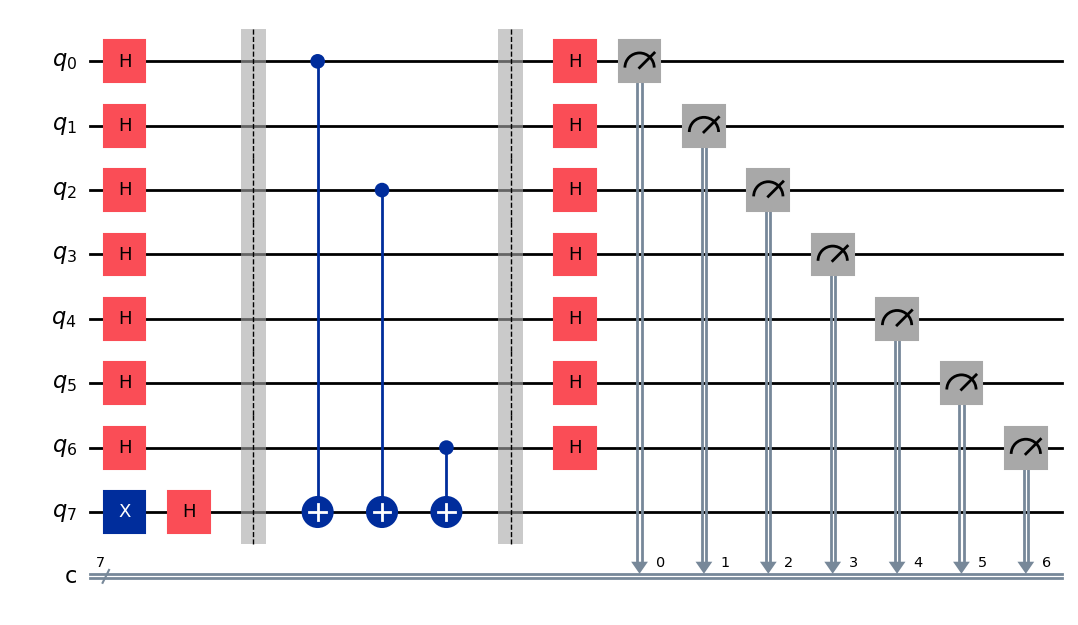

In [21]:
qc = QuantumCircuit(8,7)
qc.h([0,1,2,3,4,5,6])
qc.x(7)
qc.h(7)

qc.barrier()

qc.cx(0,7)
qc.cx(2,7)
qc.cx(6,7)
qc.barrier()

qc.h([0,1,2,3,4,5,6])
qc.measure([0,1,2,3,4,5,6], [0,1,2,3,4,5,6])
qc.draw(output='mpl')

In [22]:
qc_compiled = transpile(qc, qasm_sim)

In [23]:
job = qasm_sim.run(qc_compiled, shots=1)
results = job.result()

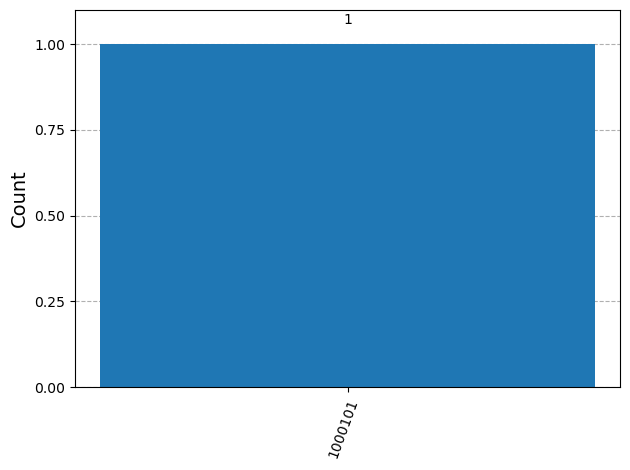

In [24]:
plot_histogram(results.get_counts(qc))

In [25]:
print(results.get_counts(qc))

{'1000101': 1}


## Algoritmanın Geliştirilmiş Hali

Şimdi yukarıdaki algoritmanın basit halini gördük ve yapmış olduğumuz işlemde gizli bit dizisini biliyorduk ve ona göre devreyi tasarladık ve sonucu bulduk. Şimdi ise hiç bilmiyoruz diyelim bu gizli şifreyi ne yapmamız gerekli aynı şekilde aşağıdaki algoritmanın geliştirlmiş hali ile artık ne kadar uzunlukta olursa olsun gizli dizimiz 1 seferde bulacaktır.

In [26]:
secretNum = "01110110001"

In [27]:
qc_1 = QuantumCircuit(len(secretNum) + 1, len(secretNum))

In [28]:
qc_1.h(range(len(secretNum)))
qc_1.x(len(secretNum))
qc_1.h(len(secretNum))
qc_1.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=12, num_clbits=0, params=[]), qubits=(<Qubit register=(12, "q"), index=0>, <Qubit register=(12, "q"), index=1>, <Qubit register=(12, "q"), index=2>, <Qubit register=(12, "q"), index=3>, <Qubit register=(12, "q"), index=4>, <Qubit register=(12, "q"), index=5>, <Qubit register=(12, "q"), index=6>, <Qubit register=(12, "q"), index=7>, <Qubit register=(12, "q"), index=8>, <Qubit register=(12, "q"), index=9>, <Qubit register=(12, "q"), index=10>, <Qubit register=(12, "q"), index=11>), clbits=())

In [29]:
for index, one in enumerate(reversed(secretNum)):
    print(f"index: {index} is {one}")
    if one == "1":
        qc_1.cx(index, len(secretNum))
        
qc_1.barrier()

index: 0 is 1
index: 1 is 0
index: 2 is 0
index: 3 is 0
index: 4 is 1
index: 5 is 1
index: 6 is 0
index: 7 is 1
index: 8 is 1
index: 9 is 1
index: 10 is 0


CircuitInstruction(operation=Instruction(name='barrier', num_qubits=12, num_clbits=0, params=[]), qubits=(<Qubit register=(12, "q"), index=0>, <Qubit register=(12, "q"), index=1>, <Qubit register=(12, "q"), index=2>, <Qubit register=(12, "q"), index=3>, <Qubit register=(12, "q"), index=4>, <Qubit register=(12, "q"), index=5>, <Qubit register=(12, "q"), index=6>, <Qubit register=(12, "q"), index=7>, <Qubit register=(12, "q"), index=8>, <Qubit register=(12, "q"), index=9>, <Qubit register=(12, "q"), index=10>, <Qubit register=(12, "q"), index=11>), clbits=())

In [30]:
qc_1.h(range(len(secretNum)))
qc_1.barrier()
qc_1.measure(range(len(secretNum)), range(len(secretNum)))

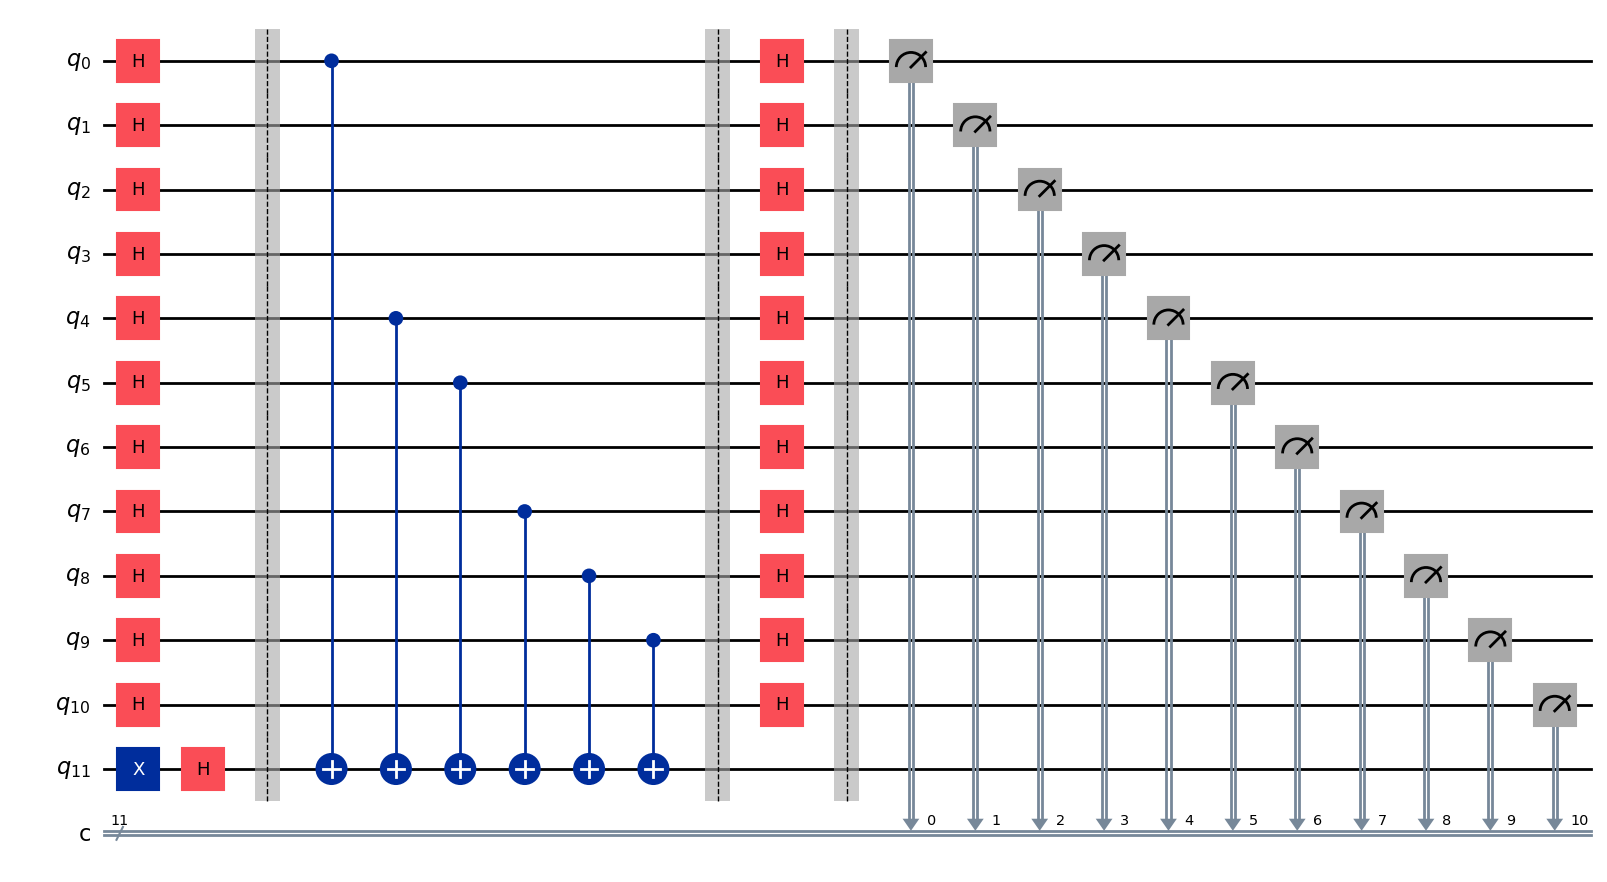

In [31]:
qc_1.draw(output='mpl')

In [32]:
qc_compiled1 = transpile(qc_1, qasm_sim)

In [33]:
job_1 = qasm_sim.run(qc_compiled1, shots=1)
results = job_1.result()

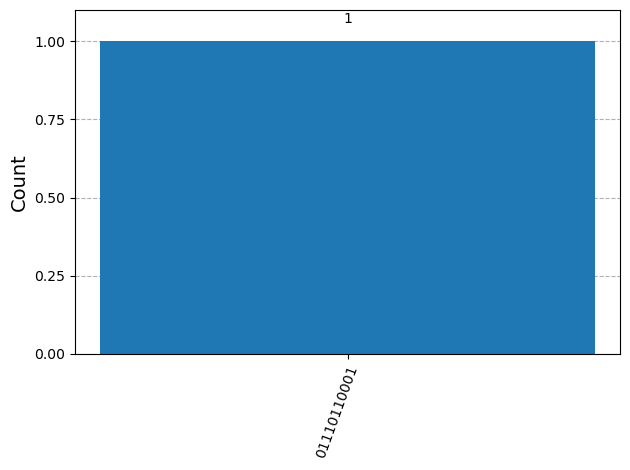

In [34]:
plot_histogram(results.get_counts(qc_1)) 

## Klasik Vazirani Algoritması kuantum kullanmadan

Yukarıda algoritmanın kuantum kapıları ile oluşturulduğu zaman 1 seferde bulduğunu gördük. Şimdi ise aşağıdaki klasik algoritmayı çalıştıralım

In [35]:
import random

In [36]:
def make_oracle(s: str):
    """s·x mod 2’yi int olarak dönen oracle."""
    n = len(s)
    def f(x: str) -> int:
        assert len(x) == n
        # bit çarpımlarını topla ve mod 2 al
        return sum(int(si) * int(xi) for si, xi in zip(s, x)) % 2
    return f

In [37]:
def classical_bv(f, n: int):
    recovered = []
    log = []
    for i in range(n):
        # sadece i’inci biti 1 yapan x
        x = ['0'] * n
        x[i] = '1'
        x_str = ''.join(x)
        bit = f(x_str)    # 0 veya 1
        recovered.append(str(bit))
        log.append((i+1, x_str, bit))
    return ''.join(recovered), log

In [39]:
secret = ''.join(random.choice('10') for _ in range(6))
oracle = make_oracle(secret)
print("Gizli dize:          ", secret)

rec, log = classical_bv(oracle, len(secret))
print("Klasikle bulunan dize:", rec)
print("\nSorgu detayları:")
for qno, x, bit in log:
    print(f"  Sorgu {qno:>2}: x = {x} → f(x) = {bit}  (bu, s[{qno-1}]’i buldu)")

Gizli dize:           000010
Klasikle bulunan dize: 000010

Sorgu detayları:
  Sorgu  1: x = 100000 → f(x) = 0  (bu, s[0]’i buldu)
  Sorgu  2: x = 010000 → f(x) = 0  (bu, s[1]’i buldu)
  Sorgu  3: x = 001000 → f(x) = 0  (bu, s[2]’i buldu)
  Sorgu  4: x = 000100 → f(x) = 0  (bu, s[3]’i buldu)
  Sorgu  5: x = 000010 → f(x) = 1  (bu, s[4]’i buldu)
  Sorgu  6: x = 000001 → f(x) = 0  (bu, s[5]’i buldu)


## 5. Kaynakçalar <a id='references'></a>
1. Ethan Bernstein and Umesh Vazirani (1997) "Quantum Complexity Theory" SIAM Journal on Computing, Vol. 26, No. 5: 1411-1473, [doi:10.1137/S0097539796300921](https://doi.org/10.1137/S0097539796300921).
2. Jiangfeng Du, Mingjun Shi, Jihui Wu, Xianyi Zhou, Yangmei Fan, BangJiao Ye, Rongdian Han (2001) "Implementation of a quantum algorithm to solve the Bernstein-Vazirani parity problem without entanglement on an ensemble quantum computer", Phys. Rev. A 64, 042306, [10.1103/PhysRevA.64.042306](https://doi.org/10.1103/PhysRevA.64.042306), [arXiv:quant-ph/0012114](https://arxiv.org/abs/quant-ph/0012114). 